# Wine dataset prediction
Después de una serie de catas, nos han dado las puntuaciones que las personas que han catado el vino. Tenemos diferentes características de los vinos como la acidez, la volatilidad etc. En este ejercicio nos proponemos predecir la puntuación del vino en base a sus características químicas y físicas.

La puntuación que se da a un vino es una variable continua que toma los valores, concretamente en este ejemplo, de 3 a 9. Cuánto mayor es la puntuación, mejor es la opinión que se tiene de ese vino en concreto. Ésta puntuación será nuestra variable a predecir, de manera que, cuando tengamos nuevos vinos en nuestra base de datos, seamos capaces de saber qué calidad pueden tener.

# Librerías


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsRegressor
import scipy.stats as stats  

# Carga del dataset

In [2]:
path = "/Users/jjmilla/Repositorios/master-umh-stat/master-umh-stat/Estadistica/datos/winequality-white.csv"
data = pd.read_csv(path, sep=";")
data.shape

(4898, 12)

In [3]:
print("columns in dataset:", list(data.columns))

columns in dataset: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


# Análisis descriptivo

In [4]:
# Descripción de las variables
data.describe()

# Conclusiones
# Las puntuaciones que se dan no están muy bien distribuidas, pues el 75% de los vinos tienen una puntuación menor o igual a 6
# Contamos con una muestra de 4898 puntuaciones y 12 mediciones de diferentes características de los vinos
# No tenemos valores nulos en ninguna de las variables, es un dataset completo e informado.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


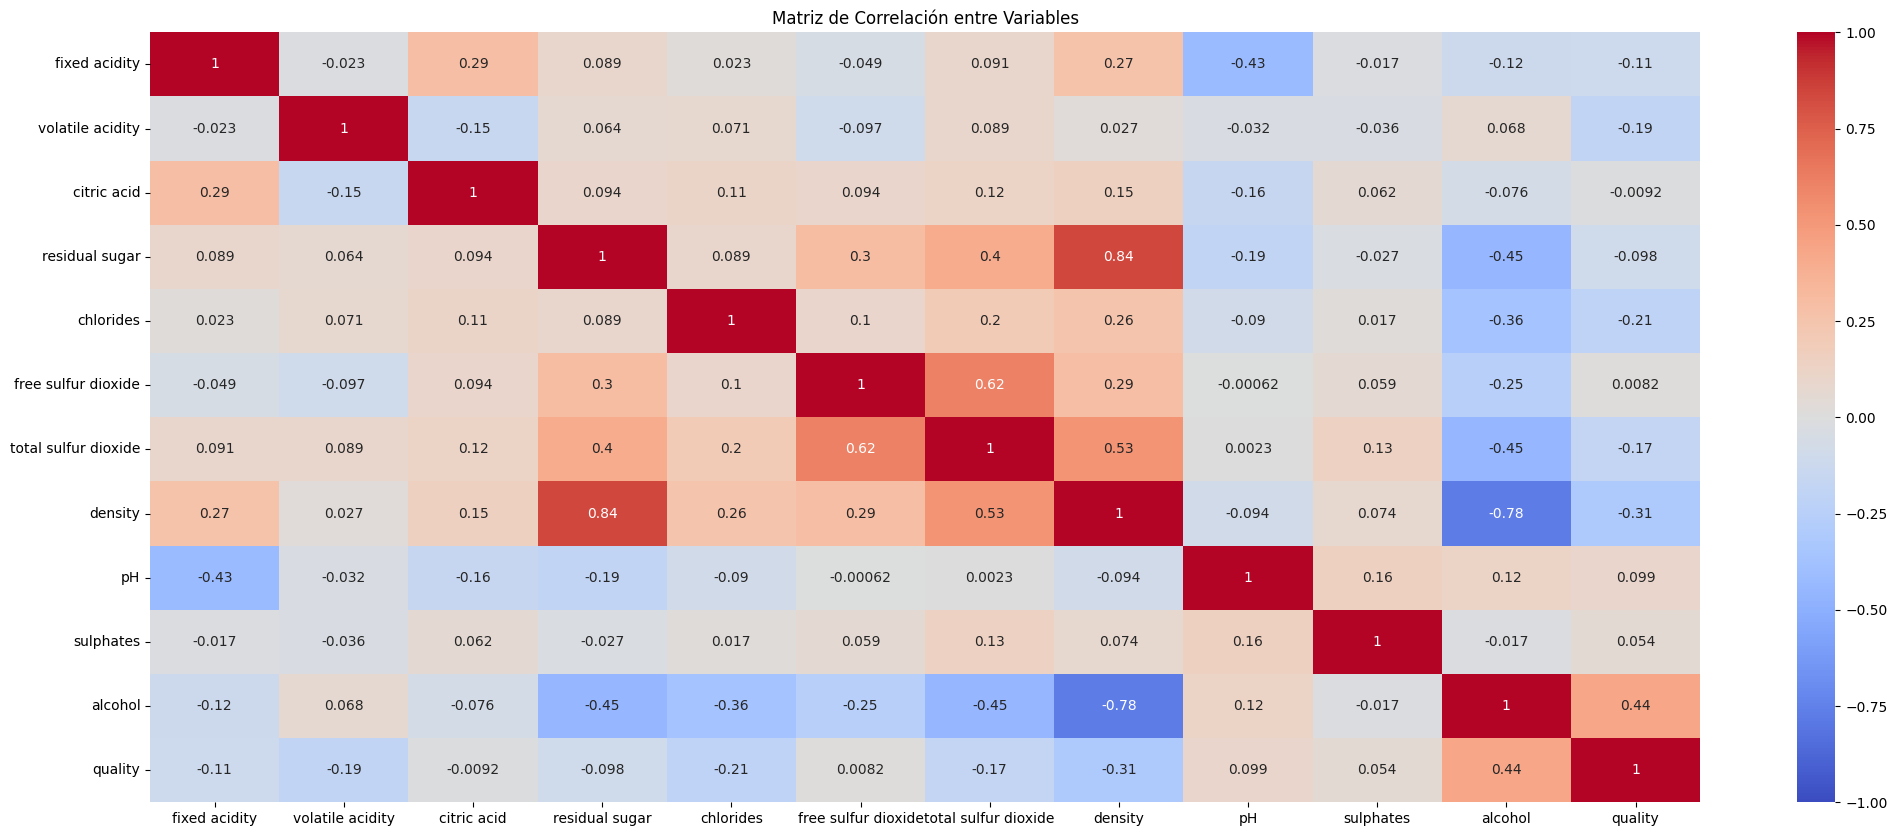

In [5]:
# Correlación de las variables
plt.figure(figsize=(25,10))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de Correlación entre Variables")
plt.show()

# Conclusiones
# Las variables más correladas con la puntuación que le dan al vino son: densidad y alcohol.
# No hay fuertes relaciones entre otras variables, pues las correlaciones se encuentran <0.20. --> "correlaciones débiles"

<Axes: xlabel='alcohol', ylabel='quality'>

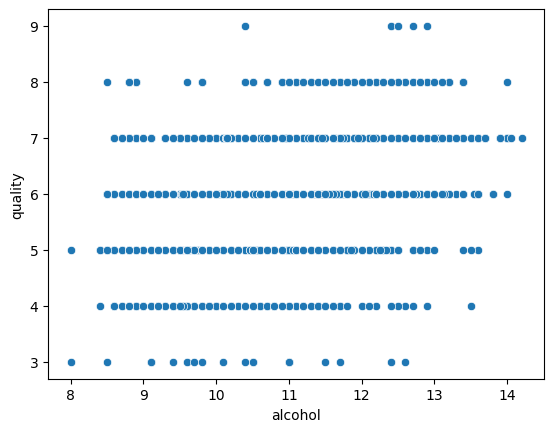

In [6]:
# El alcohol es la primera variable más correlada con la puntuación a la calidad del vino
sns.scatterplot(x="alcohol", y="quality", sizes=(50, 200), data=data)

<Axes: xlabel='density', ylabel='quality'>

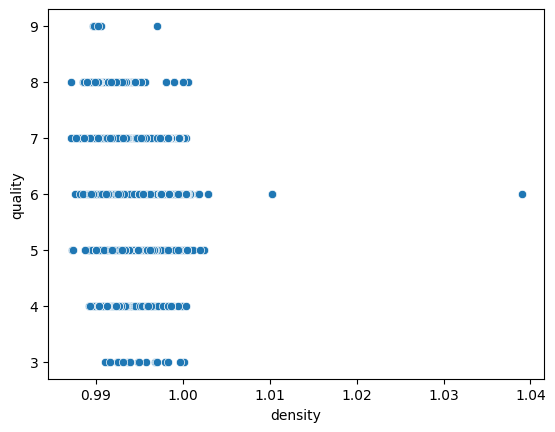

In [7]:
# La densidad es la segunda variable más correlada con la calidad del vino
sns.scatterplot(x="density", y="quality", sizes=(50, 200), data=data)

<Axes: xlabel='quality', ylabel='Count'>

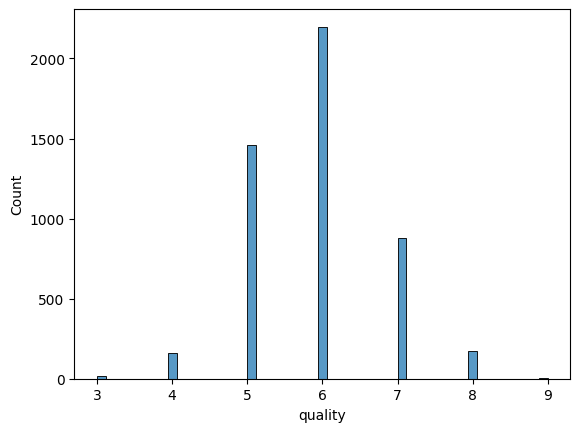

In [8]:
# ¿Cómo es la distribución del vino?
sns.histplot(data=data, x="quality")

# Preparación para la modelización - Dataset de train y test

In [9]:
# Separar en variables dependientes e independientes
column_to_predict = "quality"
Y = data[column_to_predict]
X = data.drop(columns=[column_to_predict])

print("Y shape", Y.shape)
print("X shape", X.shape)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)

print("Y_train shape", Y_train.shape)
print("Y_test shape", Y_test.shape)


Y shape (4898,)
X shape (4898, 11)
X_train shape (3918, 11)
X_test shape (980, 11)
Y_train shape (3918,)
Y_test shape (980,)


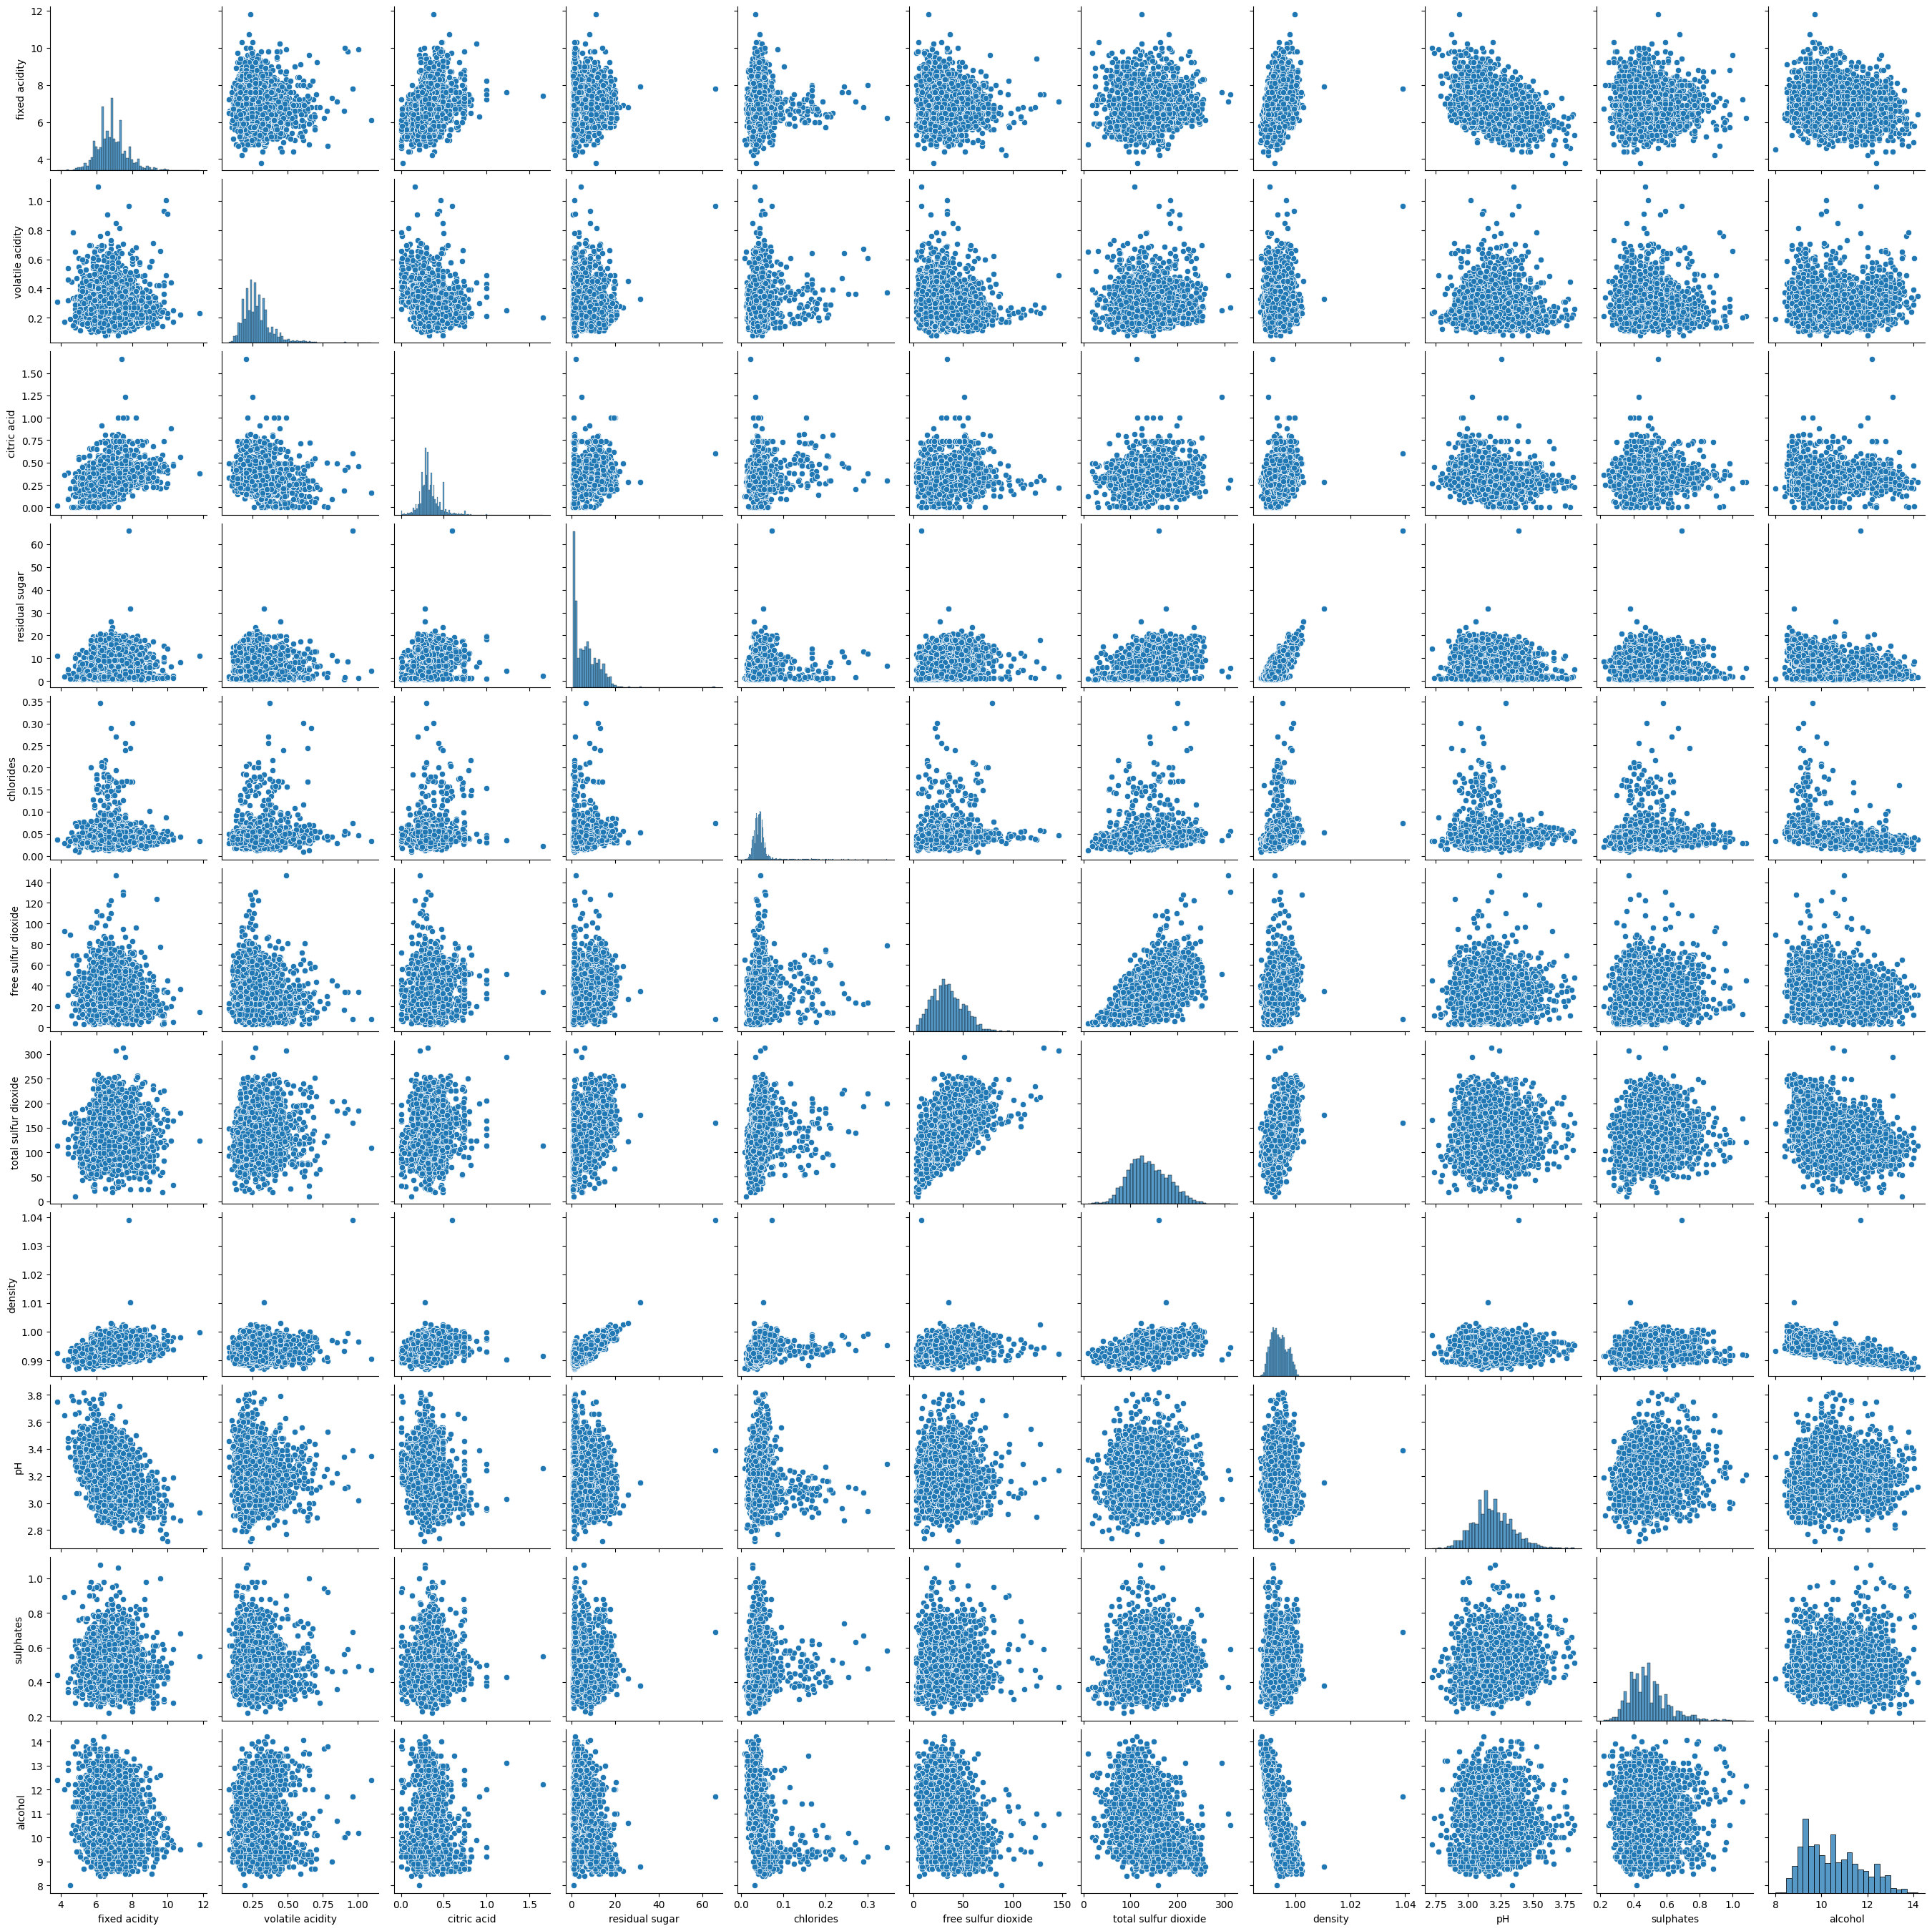

In [10]:
sns.pairplot(X_train) 
plt.show()

# Modelos

## KNN - Regression

In [11]:
# Definir el rango de valores para k
param_grid = {'n_neighbors': range(1, 40, 2)} 

# Crear el modelo de regresión kNN
modelo = KNeighborsRegressor()

# Realizar la búsqueda de k usando validación cruzada
grid_search = GridSearchCV(modelo, param_grid, cv=4, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

# Obtener el mejor valor de k
k = grid_search.best_params_['n_neighbors']
print(f'El mejor valor de k: {k}')

El mejor valor de k: 27


In [12]:
# Ajustar el modelo con el mejor k
modelo_knn_best = KNeighborsRegressor(n_neighbors=k)
modelo_knn_best.fit(X_train, Y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = modelo_knn_best.predict(X_test)

# Evaluar el rendimiento del modelo
mse_knn = mean_squared_error(Y_test, y_pred)
r2_knn = r2_score(Y_test, y_pred)

# Imprimir las métricas de evaluación
print(f'Error cuadrático medio (MSE): {mse_knn:.2f}')
print(f'Coeficiente de determinación (R²): {r2_knn:.2f}')

Error cuadrático medio (MSE): 0.64
Coeficiente de determinación (R²): 0.17


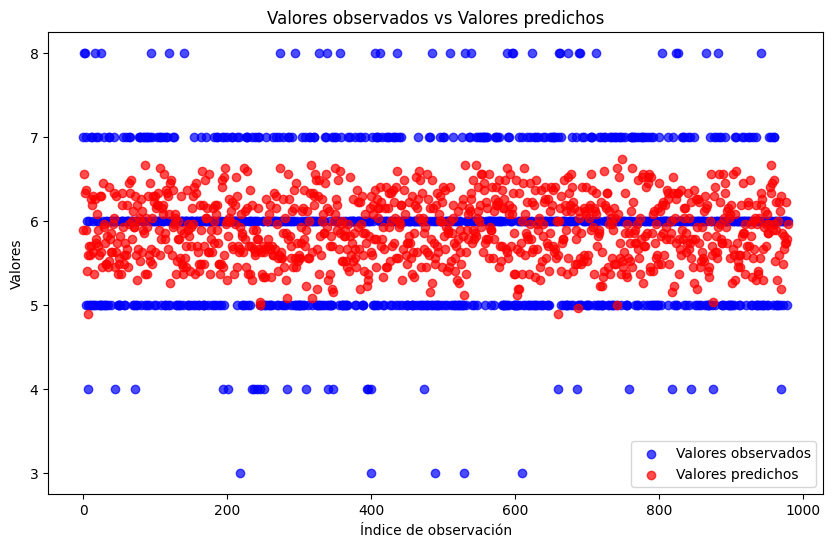

In [13]:
# Visualizar las predicciones frente a los valores reales
plt.figure(figsize=(10, 6))

# Graficar los valores observados en azul
plt.scatter(range(len(Y_test)), Y_test, color='blue', label='Valores observados', alpha=0.7)

# Graficar los valores predichos en rojo
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Valores predichos', alpha=0.7)

# Configuración de los ejes
plt.xlabel('Índice de observación')
plt.ylabel('Valores')
plt.title('Valores observados vs Valores predichos')
plt.legend()
plt.show()

# Conclusiones
# Vemos que los valores predichos siempre se encuentran entre 5 y 7. El modelo no es capaz de predecir adecuadamente puntuaciones mayores de 7 y menores de 5.

## SVM - Regression

In [14]:
# Ajustar el modelo SVR para distintos valores de C y encontrar el mejor C
#C_pruebas = [0.1, 1, 10, 100, 1000]
#epsilon_pruebas = [0.1, 1, 10]
#grid_parametros = {'C': C_pruebas, 'tol': epsilon_pruebas}
#busqueda = GridSearchCV(SVR(kernel='linear'), grid_parametros, cv=4) 

# Predichos
#busqueda.fit(X_train, Y_train)

# Mostrar el mejor parámetro C obtenido con GridSearchCV
#mejor_C = busqueda.best_params_['C']

mejor_C = 1 # Este valor se ha obtenido según el código anterior con GridSearchCV. Lo fijamos para que no vuelva a hacer el cálculo que tarda 10 minutos.

print(f"Mejor valor de C: {mejor_C}")

Mejor valor de C: 1


MSE con SVM: 0.5853336435728704
R^2 con SVM: 0.2442169828511479


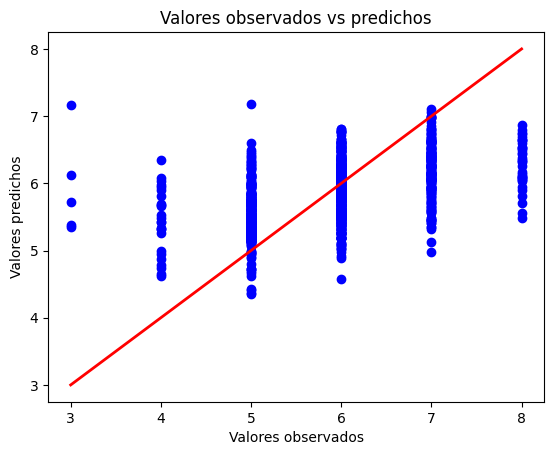

In [15]:
# Entrenar el modelo SVR con el mejor C
modelo = SVR(C=mejor_C, kernel='linear')
modelo.fit(X_train, Y_train)

# Realizar predicciones
predicciones = modelo.predict(X_test)

# Calcular el error cuadrático medio (MSE) y el R^2
mse_svm = mean_squared_error(Y_test, predicciones)
r2_svm = r2_score(Y_test, predicciones)
print(f"MSE con SVM: {mse_svm}")
print(f"R^2 con SVM: {r2_svm}")

# Gráfico de valores observados vs predichos
plt.scatter(Y_test, predicciones, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linewidth=2)
plt.title("Valores observados vs predichos")
plt.xlabel("Valores observados")
plt.ylabel("Valores predichos")
plt.show()

In [16]:
# Obtención de los pesos del hiperplano en SVR
pesos = modelo.coef_[0]
intercepto = modelo.intercept_
print("Pesos del hiperplano (SVR):", pesos, intercepto)

Pesos del hiperplano (SVR): [-3.71895011e-02 -2.00565561e+00 -2.21707660e-01  2.51418592e-02
 -6.41676808e-01  6.01290557e-03 -1.20783784e-03 -1.75983847e-01
  3.47481373e-01  5.54088955e-01  3.62977182e-01] [1.52969956]


## Random Forest - Regression

Error Cuadrático Medio: 0.34775581632653063
R^2: 0.5509775612930288


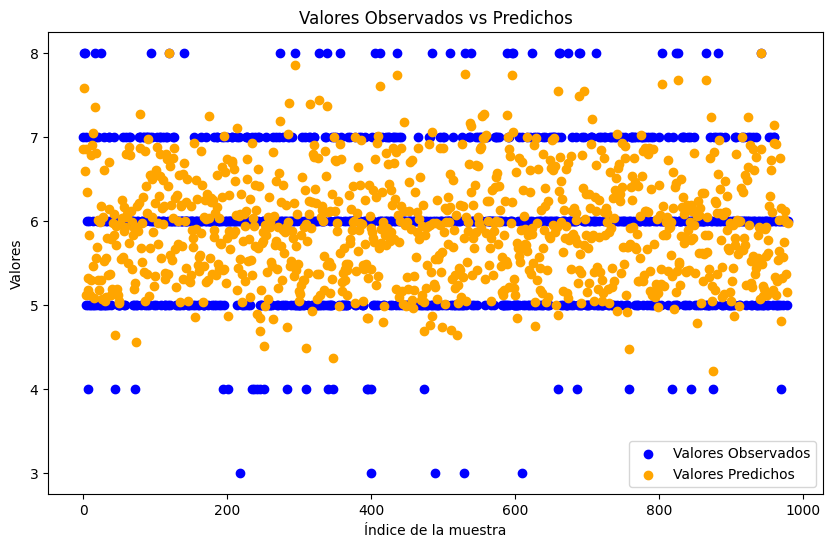

In [17]:
# Inicializar y entrenar el modelo de Random Forest para regresión
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, Y_train)

# Hacer predicciones sobre el conjunto de prueba
predicciones = modelo.predict(X_test)

# Calcular el error cuadrático medio y el R^2
mse_random_forest_regressor = mean_squared_error(Y_test, predicciones)
r2_random_forest_regressor = r2_score(Y_test, predicciones)
print(f'Error Cuadrático Medio: {mse_random_forest_regressor}')
print(f'R^2: {r2_random_forest_regressor}')

# Graficar valores observados vs predichos
plt.figure(figsize=(10, 6))

plt.scatter(range(len(Y_test)), Y_test, color='blue', label='Valores Observados')
plt.scatter(range(len(Y_test)), predicciones, color='orange', label='Valores Predichos')
plt.xlabel('Índice de la muestra')
plt.ylabel('Valores')
plt.title('Valores Observados vs Predichos')

plt.legend()
plt.show()

# Tabla resumen de modelos

In [18]:
# Datos para el DataFrame
data = {
    'Modelo': ['RandomForestRegressor', 'SVM', 'KNN_27'],
    'MSE': [mse_random_forest_regressor, mse_svm, mse_knn],
    'R2': [r2_random_forest_regressor, r2_svm, r2_knn]
}

# Crear el DataFrame
df = pd.DataFrame(data)

display(df)

,Modelo,MSE,R2
0,RandomForestRegressor,0.347756,0.550978
1,SVM,0.585334,0.244217
2,KNN_27,0.642712,0.170131
